In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',header=None, names=['patient_id', 'disease'])

diagnosis_df.head()

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
print(diagnosis_df.disease.value_counts())
print('')
print(diagnosis_df.disease.value_counts(normalize=True)*100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


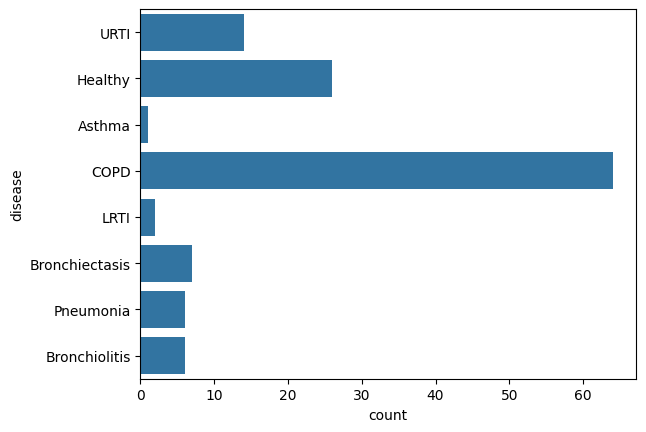

In [ ]:
sns.countplot(diagnosis_df.disease)
plt.show()

In [ ]:
path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [ ]:
files[:10]

['160_1b3_Ar_mc_AKGC417L',
 '160_1b4_Ar_mc_AKGC417L',
 '160_1b3_Pr_mc_AKGC417L',
 '160_1b4_Al_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '160_2b4_Ar_mc_AKGC417L',
 '160_1b4_Tc_mc_AKGC417L',
 '160_1b4_Lr_mc_AKGC417L',
 '160_1b4_Pr_mc_AKGC417L']

In [ ]:
def extract_patient_id(filename):
    return filename.split('_')[0]
length=len(files)
index=range(length)
i=0
patient_df=pd.DataFrame(index=index,columns=['patient_id','filename'])
for f in files:
    patient_df.iloc[i]['patient_id']=extract_patient_id(f)
    patient_df.iloc[i]['filename']=f
    i+=1

patient_df.head()

,patient_id,filename
0,160,160_1b3_Ar_mc_AKGC417L
1,160,160_1b4_Ar_mc_AKGC417L
2,160,160_1b3_Pr_mc_AKGC417L
3,160,160_1b4_Al_mc_AKGC417L
4,160,160_1b3_Tc_mc_AKGC417L


In [ ]:
import glob
directory_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
text_files = glob.iglob(path + '/*.txt', recursive=True)
text_files_list = list(text_files)

dfs = []
for file in text_files_list:

    content = pd.read_csv(file, names = ["start_time", "end_time", "crackles", "wheezes"], delimiter = "\t")
    patient_number = file.split("_")[7][6:]
    content['patient'] = int(patient_number)
    dfs.append(content)
samples = pd.concat(dfs)

print("There are", len(samples), "cycles")
print("There are", len(text_files_list), "samples")

There are 6898 cycles
There are 920 samples


In [ ]:
# 텍스트 파일 읽기
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', sep='\t', header=None, names=['patient_id', 'disease'])

In [ ]:
label_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1p1_Al_sc_Meditron.txt'
# 텍스트 파일 읽기
label_data_list = pd.read_csv(label_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list)

[{'Beginning of respiratory': 2.2855, 'End of respiratory': 6.2646, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 6.2646, 'End of respiratory': 10.44, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 10.44, 'End of respiratory': 14.112, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 14.112, 'End of respiratory': 18.217, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 18.217, 'End of respiratory': 23.111, 'crackles': 0, 'wheezes': 0}, {'Beginning of respiratory': 23.111, 'End of respiratory': 26.658, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 26.658, 'End of respiratory': 32.3, 'crackles': 1, 'wheezes': 0}]


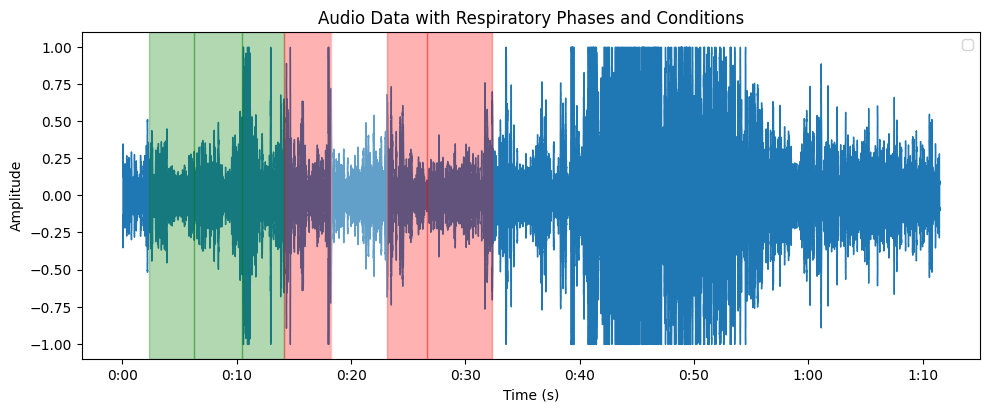

In [ ]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1b1_Pr_sc_Meditron.wav'  # 오디오 파일 경로
y, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

###Mel-Spectogram

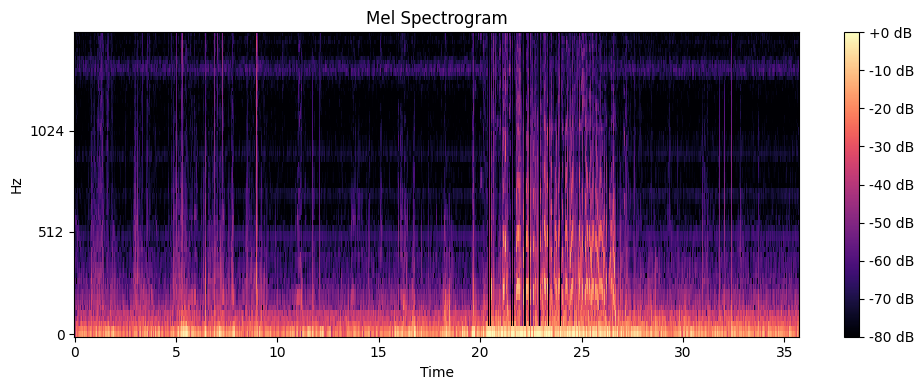

In [ ]:
# 예제 오디오 신호 'y'와 샘플링 레이트 'sr' 가정
# y, sr = librosa.load(audio_path, sr=sample_rate)

# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Audio

# 노이즈가 제거된 오디오 재생
Audio(data=y, rate=sr)

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut,fs, order=5):
    nyq= 0.5*fs
    low= lowcut/nyq
    high= highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs, order=5):
    b,a= butter_bandpass( lowcut, highcut, fs, order)
    y=lfilter(b,a,data)
    return y

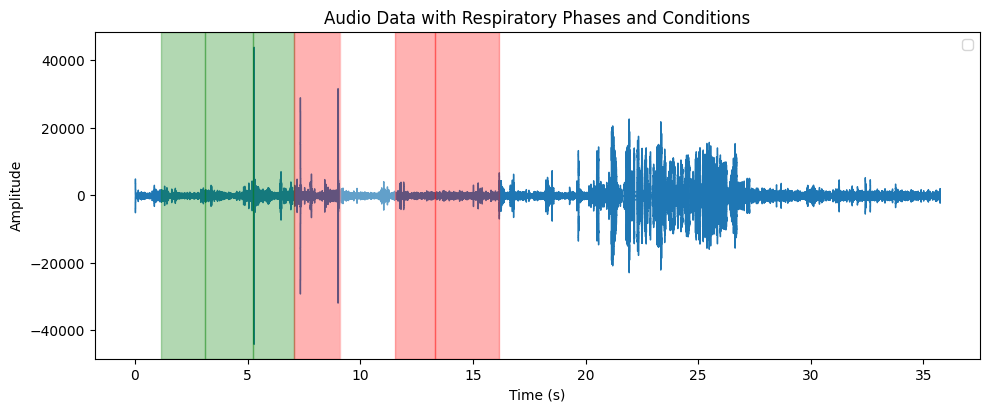

In [ ]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1b1_Pr_sc_Meditron.wav'  # 오디오 파일 경로
y2, sr = librosa.load(wav_file_path, sr=8000)  # y는 오디오 신호, sr은 샘플링 레이트
audio = y * (2 ** 15 - 1) / np.max(np.abs(y))
y2 = butter_bandpass_filter(audio, 100,520, sr, 3)

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

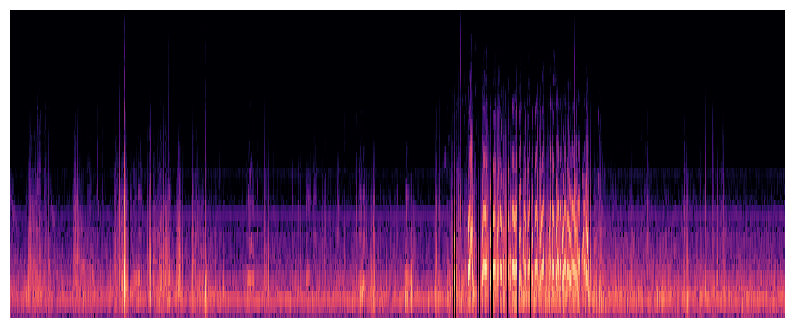

In [ ]:
# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y2, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

import numpy as np

# 빈 값을 0 대신에 -80dB로 대체
S = librosa.power_to_db(S, ref=np.max)
S = np.nan_to_num(S, nan=-80)

plt.figure(figsize=(10, 4), facecolor='none')  # 배경을 투명하게 설정

librosa.display.specshow(S, sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')

for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    # if crackles:
    #     color = 'white'  # crackles만 1일 경우
    #     ymin = 100/f_max
    #     ymax = 300/f_max

    #     plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=1,linewidth=4, fill=True)

    # if wheezes:
    #     color = 'white'  # wheezes만 1일 경우
    #     ymin = 100/f_max
    #     ymax = 1800/f_max

    # # 사각형 영역 표시
    #     plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=1,linewidth=4, fill=True)

# 축 레이블과 컬러 바를 없애기
plt.axis('off')

plt.savefig('mel_spectrogram.png', bbox_inches=0 , pad_inches=0, transparent=True)  # 이미지 저장, 투명하게 설정
plt.show()

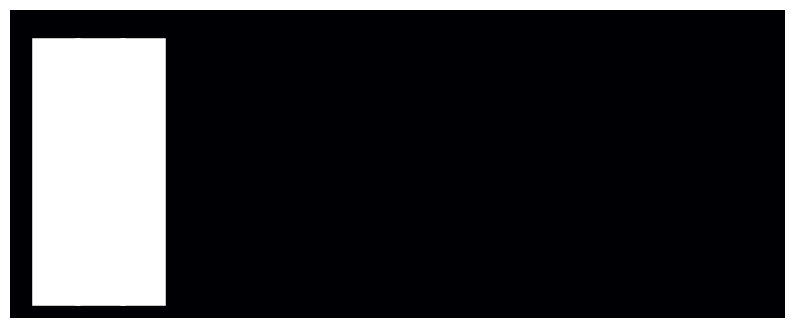

In [ ]:
plt.figure(figsize=(10, 4), facecolor='none')

librosa.display.specshow(S, sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time', vmin=100, vmax=200)  # vmin과 vmax 값 설정

for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    wheezes = entry["wheezes"]

    if wheezes:
        color = 'white'
        ymin = 100/f_max
        ymax = 1800/f_max

        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=1, linewidth=4, fill=True)

plt.axis('off')

plt.savefig('mel_spectrogram.png', bbox_inches=0 , pad_inches=0, transparent=True)
plt.show()


<ipython-input-19-833eb9981910>:33: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.7,linewidth=2, fill=False)


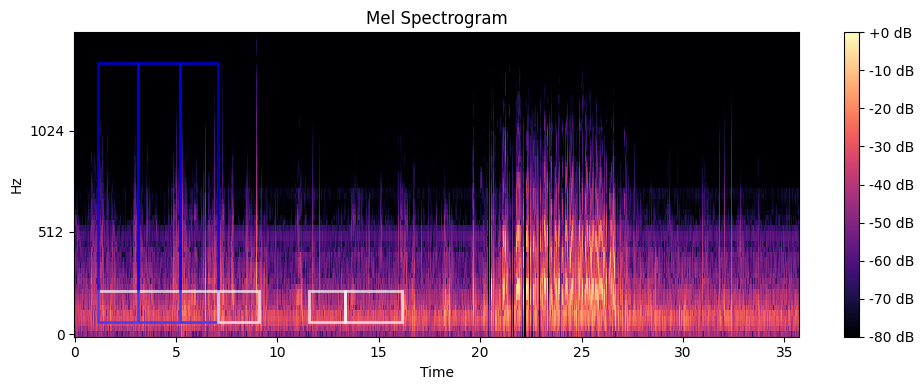

In [ ]:
plt.show()# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y2, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')


# {'Beginning of respiratory': 0.042, 'End of respiratory': 1.28, 'crackles': 0, 'wheezes': 1}

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles:
        color = 'white'  # crackles만 1일 경우
        ymin = 100/f_max
        ymax = 300/f_max

        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.7,linewidth=2, fill=False)

    if wheezes:
        color = 'blue'  # wheezes만 1일 경우
        ymin = 100/f_max
        ymax = 1800/f_max

    # 사각형 영역 표시
        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.7,linewidth=2, fill=False)

plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

###사각형 검출 코드

In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list[1])

{'Beginning of respiratory': 6.2646, 'End of respiratory': 10.44, 'crackles': 1, 'wheezes': 1}


Rectangle coordinates: 9 9 776 309
Rectangle coordinates: 9 9 776 309
Rectangle coordinates: 32 38 134 268
Rectangle coordinates: 32 38 134 268


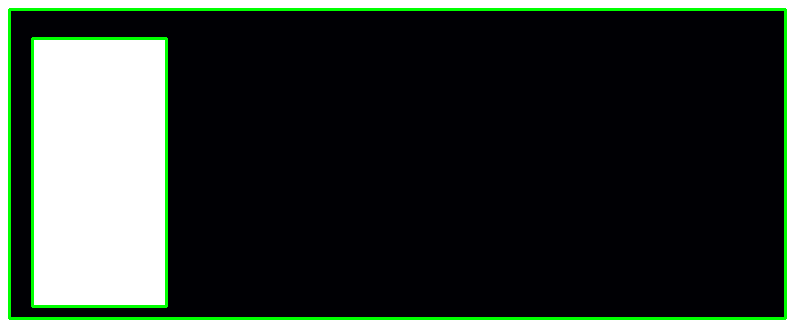

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 불러오기
image = cv2.imread('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/test_image.png')

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection 적용
edges = cv2.Canny(gray, 700, 800, apertureSize=3)

# Contour 검출
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 각 Contour에 대해 검출된 네모의 좌표를 출력
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    print("Rectangle coordinates:", x, y, w, h)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 결과 이미지 출력
cv2_imshow(image)

###Pascal Voc

In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list[0])

{'Beginning of respiratory': 2.2855, 'End of respiratory': 6.2646, 'crackles': 1, 'wheezes': 1}


0
1
2
3
4
5
6


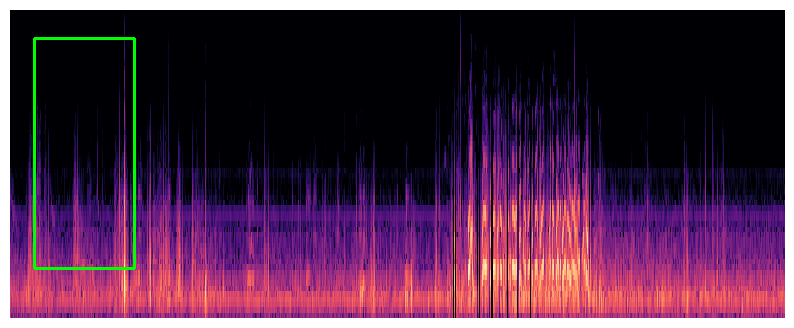

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom import minidom


# 이미지 파일 경로
image_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/mel_spectrugram.png'

# 객체의 바운딩 박스 좌표 (좌측 상단과 우측 하단 좌표)



for i in range (len(data_list)) :
  print(i)
  # data_list 예시
  if data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 0:
      class_labels = ['crackles']
      bboxes = [[(34, 38), (134, 268)]]
  elif data_list[i]['crackles'] == 0 and data_list[i]['wheezes'] == 1:
      class_labels = ['wheezes']
      bboxes = [[(34, 38), (134, 268)]]
  elif data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 1:
      class_labels = ['crackles', 'wheezes']
      bboxes = [[(34, 38), (134, 268)], [(34, 38), (134, 268)]]
  else:
      class_labels = []
      bboxes =[]

# XML 파일 작성
def create_xml(image_path, bboxes, data_list):
    for data in data_list:
        root = ET.Element("annotation")

        # 이미지 파일명
        filename = ET.SubElement(root, "filename")
        filename.text = image_path.split('/')[-1]

        # 크기 정보
        size = ET.SubElement(root, "size")
        width, height = cv2.imread(image_path).shape[:2]
        width_element = ET.SubElement(size, "width")
        width_element.text = str(width)
        height_element = ET.SubElement(size, "height")
        height_element.text = str(height)

        # 객체 정보
        for i, bbox in enumerate(bboxes):
            obj = ET.SubElement(root, "object")
            name = ET.SubElement(obj, "name")
            name.text = class_labels[i]
            bbox_element = ET.SubElement(obj, "bndbox")
            xmin, ymin = bbox[0]
            xmax, ymax = bbox[1]
            xmin_element = ET.SubElement(bbox_element, "xmin")
            xmin_element.text = str(xmin)
            ymin_element = ET.SubElement(bbox_element, "ymin")
            ymin_element.text = str(ymin)
            xmax_element = ET.SubElement(bbox_element, "xmax")
            xmax_element.text = str(xmax)
            ymax_element = ET.SubElement(bbox_element, "ymax")
            ymax_element.text = str(ymax)

        xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
        with open(image_path[:-4] + '_crackles_' + str(data['crackles']) + '.xml', "w") as f:
            f.write(xmlstr)

# 이미지에 바운딩 박스 그리기
image = cv2.imread(image_path)
for bbox in bboxes:
    cv2.rectangle(image, bbox[0], bbox[1], (0, 255, 0), 2)

# 이미지 표시 및 저장
cv2_imshow(image)
cv2.imwrite(image_path[:-4] + '_annotated.jpg', image)

# XML 파일 작성
create_xml(image_path, bboxes, data_list)
